In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [14]:
col_names = ['Sex','School','Grade','Father work','Mother work','Income','Domicile','Major','label']
# load dataset
pima = pd.read_csv("PJ_F.csv", header=None, names=col_names)

In [15]:
pima.head()

,Sex,School,Grade,Father work,Mother work,Income,Domicile,Major,label
0,1,1,2.61,1,6,6,0,2,1
1,0,2,3.22,0,5,2,0,0,1
2,1,1,3.55,0,5,1,0,0,1
3,1,1,2.55,1,3,5,0,0,1
4,1,1,3.15,3,4,3,0,6,0


In [16]:
#split dataset in features and target variable
feature_cols = ['Sex','School','Grade','Father work','Mother work','Income','Domicile','Major']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [17]:
# Split dataset into training set and test set"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9178082191780822


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.85      0.92        41

    accuracy                           0.92        73
   macro avg       0.92      0.93      0.92        73
weighted avg       0.93      0.92      0.92        73

[[32  0]
 [ 6 35]]


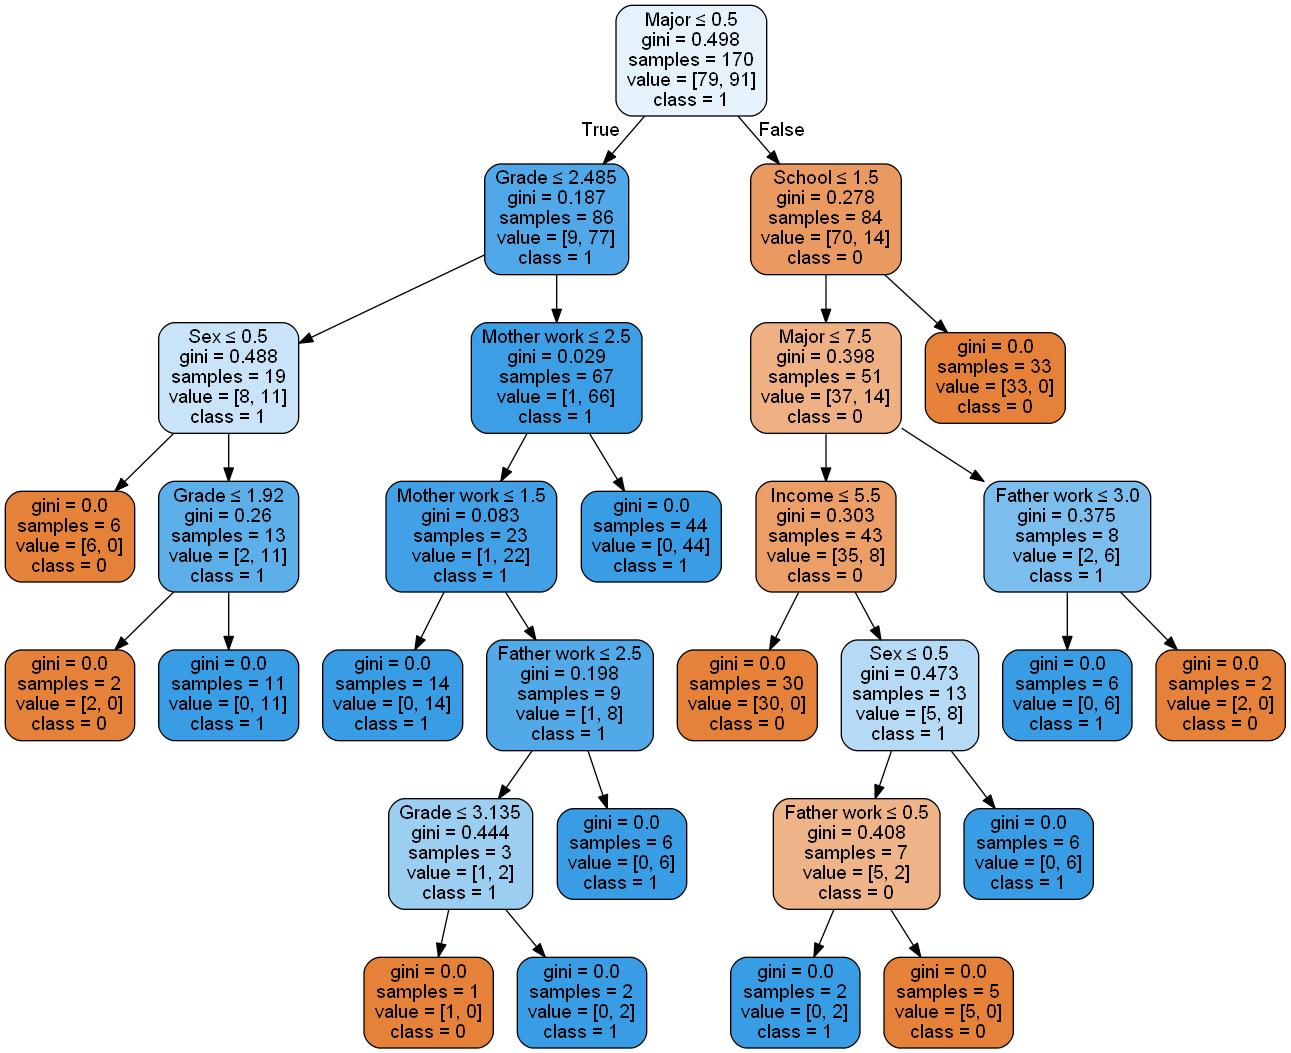

In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree IF.png')
Image(graph.create_png())

In [25]:
# Evaluate the model's accuracy
print("Train set accuracy = " + str(clf.score(X_train, y_train)))
print("Test set accuracy = " + str(clf.score(X_test, y_test)))

Train set accuracy = 1.0
Test set accuracy = 0.9178082191780822


In [26]:
import pickle

In [35]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
columns=list(trainX.columns)
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("classifiers/classifier.txt","w+")
f.write(dot_data)
f.close()

NameError: name 'trainX' is not defined